In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ngo = pd.read_csv("Country-data.csv")

In [3]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
ngo.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
ngo1 = ngo.iloc[:,1:11 ]
ngo1.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [7]:
ngo1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Normalization

In [9]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
ngo1 = norm.fit_transform(ngo1)

In [10]:
#Agglomerative Heirarchial Clustering

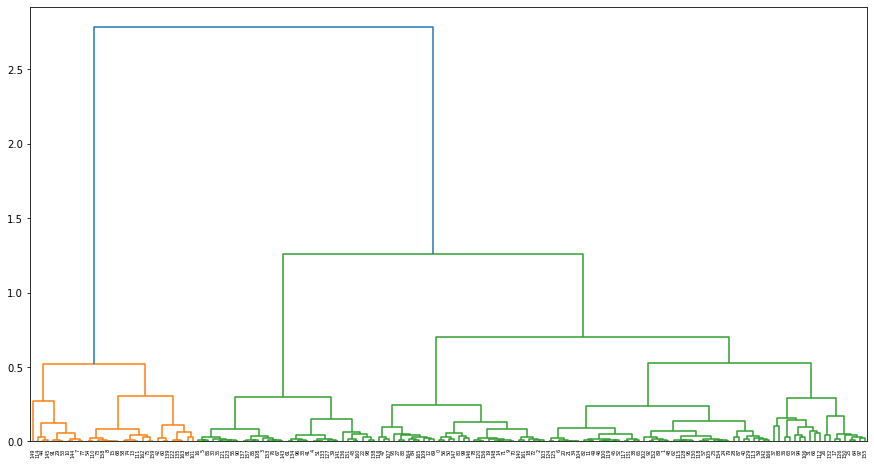

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(ngo1,method = "ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation = "top",distance_sort = "ascending",show_leaf_counts=True)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 2,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(ngo1)
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [13]:
ngo3 = pd.DataFrame({"Labels":labels,"Countries":ngo["country"]})
ngo3

,Labels,Countries
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda
...,...,...
162,1,Vanuatu
163,1,Venezuela
164,0,Vietnam
165,0,Yemen


In [14]:
pd.crosstab(ngo3["Labels"],ngo3["Countries"])

Countries,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
Labels,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,0,1,...,1,0,0,1,1,0,0,1,1,1
1,0,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,1,1,0,0,0


In [15]:
#PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(ngo1)
x_pca = pca.transform(ngo1)
x_pca.shape

(167, 2)

In [17]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(ngo1)
    inertia.append(model.inertia_)
print(inertia)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.56547363590342, 1.6396610012586132, 0.8446384593352135, 0.6119593552562793, 0.49325571957342546, 0.37657405009860473, 0.3067207644234218, 0.2598073591174682, 0.22777934259324284, 0.1921210153994717]


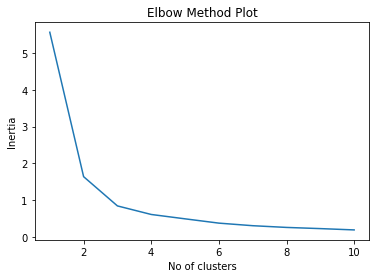

In [18]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(ngo1)
km=model_kmeans.predict(ngo1)
print(model_kmeans.labels_)

[0 0 0 2 2 2 0 1 1 0 1 2 0 1 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 1 2 0 0 2 0 2 2
 2 2 2 0 2 1 2 1 2 2 0 0 2 0 2 2 1 1 2 0 0 1 0 1 2 0 2 0 2 0 2 1 0 0 0 0 1
 1 1 2 1 0 0 0 1 2 0 0 2 2 0 0 0 2 1 0 0 0 0 2 0 2 0 2 1 0 0 0 0 0 0 2 0 1
 1 0 0 1 0 0 2 0 2 0 2 1 2 0 0 0 2 0 0 0 2 0 2 2 1 2 2 2 1 0 2 0 2 1 1 0 0
 0 1 0 2 0 2 0 0 0 2 1 1 2 0 1 1 0 0 0]


In [20]:
# Checking accuracy of Cluster number

In [21]:
from sklearn.metrics import silhouette_score
range = [2, 3, 4, 5, 6, 7, 8]

for j in range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=j, max_iter=50)
    kmeans.fit(ngo1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(j, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6410760013081505
For n_clusters=3, the silhouette score is 0.5198837827909313
For n_clusters=4, the silhouette score is 0.4668632199420871
For n_clusters=5, the silhouette score is 0.49356364961886356
For n_clusters=6, the silhouette score is 0.4721803077376323
For n_clusters=7, the silhouette score is 0.472716309696272
For n_clusters=8, the silhouette score is 0.4303200384466512


In [22]:
#From silhouette score We can take (K = 2)

In [23]:
cluster=KMeans(n_clusters=2,init='k-means++',random_state=42)
model=cluster.fit(ngo1)

In [24]:
pd.Series(model.labels_).value_counts()

0    127
1     40
dtype: int64

In [25]:
pc=np.transpose(x_pca)
pca_data=pd.DataFrame({'PCA_1':pc[0],'PCA_2':pc[1]})


In [26]:
pca_data.head()


,PCA_1,PCA_2
0,-0.180711,0.034561
1,-0.118949,-0.024627
2,-0.175045,-0.027422
3,0.026799,-0.001910
4,0.057226,-0.018615


In [35]:
pca_data.cloumns=['PCA_1','PCA_2','model.labels_']
pca_data.head()


,PCA_1,PCA_2
0,-0.180711,0.034561
1,-0.118949,-0.024627
2,-0.175045,-0.027422
3,0.026799,-0.001910
4,0.057226,-0.018615


In [28]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

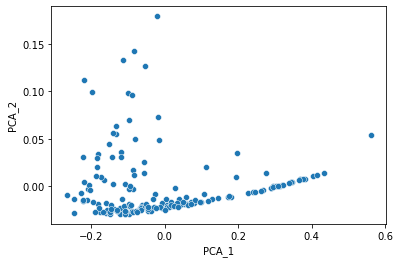

In [40]:
# Scatter plot b/w PCA_1 and PCA_2
sns.scatterplot(x='PCA_1',y='PCA_2',,data=pca_data,palette=['red','green'])